In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
train_data = pd.read_csv(r"C:\Users\IIMSc\Desktop\Predictive Analysis\pro 3\house-prices-advanced-regression-techniques\train.csv")
test_data = pd.read_csv(r"C:\Users\IIMSc\Desktop\Predictive Analysis\pro 3\house-prices-advanced-regression-techniques\test.csv")

In [31]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,142125.0


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 228 entries, Id to SalePrice
dtypes: float64(228)
memory usage: 2.5 MB


In [6]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [34]:
train_data = pd.get_dummies(train_data, drop_first=True)

In [35]:
train_data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
SalePrice                0
Length: 228, dtype: int64

In [36]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,142125.0


In [37]:
test_data = pd.get_dummies(test_data, drop_first=True)

In [38]:
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [39]:
test_data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 227, dtype: int64

In [40]:
imputer = SimpleImputer(strategy='mean')
train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

In [41]:
train_data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
SalePrice                0
Length: 228, dtype: int64

In [45]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,142125.0


In [46]:
test_data.isnull().sum()

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 227, dtype: int64

In [47]:
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [48]:
columns_to_keep = list(test_data.columns) + ['SalePrice']

In [49]:
train_data = train_data[columns_to_keep]

In [50]:
test_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915.0,160.0,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1455,2916.0,160.0,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,2917.0,20.0,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,2918.0,85.0,62.0,10441.0,5.0,5.0,1992.0,1992.0,0.0,337.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [51]:
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,142125.0


In [52]:
X_train, X_val, y_train, y_val = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'],test_size=0.2, random_state=42)

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_linear = linear_reg.predict(X_val)
y_pred_linear

array([ 157063.69396025,  339979.34875502,   85025.91042733,
        186311.13234121,  325211.27051459,   68979.38778774,
        249955.85866209,  144415.79989919,   63405.35565628,
        150237.82957016,  144636.73870206,  102931.47996701,
         70361.6986071 ,  226265.64659017,  171717.69402568,
        129403.51967139,  189888.01444397,  125234.7043256 ,
        128987.22803808,  212802.78497657,  167997.31261606,
        202367.82294636,  173670.66281673,  119779.84622116,
        201028.3354598 ,  136627.68134497,  201835.16320562,
        104502.78764761,  170952.90962849,  201825.19546513,
        143720.95900996,  276210.44168091,  236969.80341165,
        114712.80193224,  239417.15985663,  145710.86491803,
        131426.04425209,  203379.35846252,  311210.68501548,
        124112.90707953,  130623.47960122,  218275.81963737,
         99312.09433205,  358932.64621647,  133048.44793798,
        146205.34445217,   98702.24576445,  138922.62989772,
        415663.01215843,

In [55]:
final_Linear = pd.DataFrame(y_pred_linear)
final_Linear

,0
0,157063.693960
1,339979.348755
2,85025.910427
3,186311.132341
4,325211.270515
...,...
287,186145.990610
288,284461.637002
289,179236.015395
290,94137.296196


### mean squared error for Linear Regression

In [56]:
from sklearn.metrics import mean_squared_error
mse_linear = mean_squared_error(y_val, y_pred_linear)
mse_linear

np.float64(1203419247.5705206)

## accuracy

In [57]:
errors_linear = abs(y_pred_linear - y_val)
mape_linear = 100 * (errors_linear / y_val)
accuracy_linear = 100 - np.mean(mape_linear)
print('Linear Regression Accuracy:', round(accuracy_linear, 2), '%.')

Linear Regression Accuracy: 87.11 %.


# Multiple Linear Regression

In [58]:
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred_multiple_linear = multiple_linear_reg.predict(X_val)
y_pred_multiple_linear 

array([ 157063.69396025,  339979.34875502,   85025.91042733,
        186311.13234121,  325211.27051459,   68979.38778774,
        249955.85866209,  144415.79989919,   63405.35565628,
        150237.82957016,  144636.73870206,  102931.47996701,
         70361.6986071 ,  226265.64659017,  171717.69402568,
        129403.51967139,  189888.01444397,  125234.7043256 ,
        128987.22803808,  212802.78497657,  167997.31261606,
        202367.82294636,  173670.66281673,  119779.84622116,
        201028.3354598 ,  136627.68134497,  201835.16320562,
        104502.78764761,  170952.90962849,  201825.19546513,
        143720.95900996,  276210.44168091,  236969.80341165,
        114712.80193224,  239417.15985663,  145710.86491803,
        131426.04425209,  203379.35846252,  311210.68501548,
        124112.90707953,  130623.47960122,  218275.81963737,
         99312.09433205,  358932.64621647,  133048.44793798,
        146205.34445217,   98702.24576445,  138922.62989772,
        415663.01215843,

## mean squared error for Multiple Linear Regression

In [60]:
mse_multiple_linear = mean_squared_error(y_val, y_pred_multiple_linear)
mse_multiple_linear

np.float64(1203419247.5705206)

### accuracy

In [61]:
errors_mlr = abs(y_pred_multiple_linear - y_val)
mape_mlr = 100 * (errors_mlr / y_val)
accuracy_mlr = 100 - np.mean(mape_mlr)
print('Multiple Linear Regression Accuracy:', round(accuracy_mlr, 2), '%.')

Multiple Linear Regression Accuracy: 87.11 %.


# Polynomial Regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

LinearRegression()

In [63]:
y_pred_poly = poly_reg.predict(X_val_poly)
y_pred_poly

array([  98085.61231839,  380994.05863886,  142032.65505943,
        187105.9310618 ,  332764.96970625,  189506.34159042,
        317943.68972438,  162683.56204869,  143778.01593893,
         40003.13901423,  132167.12700288,  116006.36131563,
        233666.0584278 ,  162463.38181397,  158957.23655494,
        132591.22986952,  183417.38527568,  131721.00893202,
         80888.2914731 ,  212381.61806978,  228930.09837404,
        207354.89653675,  176522.62407102,  151974.25537413,
        174090.93105389,  139132.42813242,  172767.38104325,
         86879.77691405,  176506.11272778,  147467.11929223,
         76900.60827948,  311986.65567857,  579726.81394483,
        124023.63469902,  188229.54631467,  141112.82310414,
        207520.23694302,  230006.93360557,  256926.12199338,
         81602.83985981,  -36718.73582791,  252879.86868525,
         95659.12425903,  331317.40108757,   90697.64801942,
        147932.52234446,   77330.46059568,  134398.52045657,
        463708.499222  ,

## mean squared error for Polynomial Regression

In [64]:
mse_poly = mean_squared_error(y_val, y_pred_poly)
mse_poly

np.float64(8858184151.088903)

## accuracy

In [65]:
errors_poly = abs(y_pred_poly - y_val)
mape_poly = 100 * (errors_poly / y_val)
accuracy_poly = 100 - np.mean(mape_poly)
print('Polynomial Regression Accuracy:', round(accuracy_poly, 2), '%.')

Polynomial Regression Accuracy: 66.67 %.


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [67]:
y_pred_decisionTree = decision_tree.predict(X_val)
y_pred_decisionTree

array([157900., 424870., 120000., 163000., 285000.,  86000., 205000.,
       148500.,  86000., 118964., 200100., 100000., 108500., 204000.,
       179000., 126175., 186500., 126175., 113000., 210000., 115000.,
       232600., 188000., 122900., 185500., 185000., 164990., 109900.,
       173000., 196000., 116000., 233000., 189000., 100000., 256300.,
       136500., 115000., 155000., 275500., 116000., 109900., 268000.,
       119000., 402000., 132250., 140000., 119000., 139000., 501837.,
       128500., 105000., 190000., 119000., 381000., 141000., 216837.,
       193000., 140000., 138000., 116000.,  39300., 181000., 354000.,
       285000., 245350., 237500., 116050., 372500., 147000., 177000.,
       118964., 139000.,  97000.,  90000., 501837., 179200., 290000.,
       328000., 141000., 131000.,  89500., 109900., 126500.,  52000.,
       178000., 122500., 270000., 213490., 136500., 179600., 124900.,
       150000., 127000., 320000.,  87000., 181000., 130000., 146000.,
       190000., 2000

### mean squared error for Decision Tree

In [68]:
mse_decisionTree = mean_squared_error(y_val, y_pred_decisionTree)
mse_decisionTree

np.float64(1729081703.869863)

## accuracy

In [69]:
errors_dt = abs(y_pred_decisionTree - y_val)
mape_dt = 100 * (errors_dt / y_val)
accuracy_dt = 100 - np.mean(mape_dt)
print('Decision Tree Accuracy:', round(accuracy_dt, 2), '%.')

Decision Tree Accuracy: 83.6 %.


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred_random_forest = random_forest.predict(X_val)
y_pred_random_forest

array([141837.75, 327096.72, 116567.5 , 153671.28, 317919.79,  84850.  ,
       213222.04, 152080.42,  84498.66, 134196.68, 157587.54, 120895.5 ,
       106682.5 , 207948.88, 180692.78, 132069.25, 196954.4 , 133721.  ,
       116193.  , 207851.5 , 158332.1 , 222877.14, 175500.84, 124604.  ,
       193348.56, 173591.09, 182201.2 , 107110.5 , 177641.55, 192327.14,
       123078.81, 256318.13, 172498.34, 112652.04, 254082.35, 145309.16,
       138458.1 , 206345.14, 311988.93, 104627.64, 122055.5 , 237261.24,
       122372.5 , 365616.27, 135893.6 , 147409.45, 118761.33, 129410.7 ,
       392899.05, 149859.89, 121122.54, 188298.5 , 125516.62, 350504.2 ,
       139694.  , 242014.29, 195147.25, 150493.39, 144934.87, 112398.16,
        75194.5 , 152286.25, 306972.48, 287494.57, 275954.1 , 215404.42,
       109252.  , 313005.91, 116221.75, 166691.25, 132211.21, 131768.25,
       114610.  ,  91614.5 , 437366.72, 173622.73, 312519.63, 292056.16,
       135453.  , 123884.5 , 100617.5 , 100017.5 , 

### mean squared error for Random Forest

In [72]:
mse_random_forest = mean_squared_error(y_val, y_pred_random_forest)
mse_random_forest

np.float64(843088535.07595)

## accuracy

In [73]:
errors_rf = abs(y_pred_random_forest - y_val)
mape_rf = 100 * (errors_rf / y_val)
accuracy_rf = 100 - np.mean(mape_rf)
print('Random Forest Accuracy:', round(accuracy_rf, 2), '%.')

Random Forest Accuracy: 89.32 %.


# From above we can see the accuracy according to the model :

### accuracy for Linear Regression model                     : 87.14 %.
### accuracy for Multiple Linear Regression model      : 87.14 %.
### accuracy for Polynomial Regressiont model           : 70.12 %.
### accuracy for Decision Tree model                             : 84.32 %.
### accuracy for Random Forest model                          : 89.35 %.

# So we take Random forest model and we predict for test data Since its   have a more accuracy

In [74]:
X_train = train_data.drop(['SalePrice'], axis=1) 
y_train = train_data['SalePrice']

In [75]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
y_pred_random_forest = random_forest.predict(test_data)
y_pred_random_forest

array([128426.  , 151192.32, 180296.4 , ..., 151505.5 , 111571.8 ,
       223486.36])

In [77]:
# Created a DataFrame with IDs and above predicted sale prices
predictions_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': y_pred_random_forest})

# Saving the DataFrame to a CSV file
predictions_df.to_csv('FinalPrediction.csv', index=False)

## Find the importance of each of the features and visualize them

In [78]:
feature_importances = random_forest.feature_importances_
feature_importances

array([4.88957046e-03, 1.38091032e-03, 8.03917527e-03, 1.27261747e-02,
       5.79647927e-01, 4.33068755e-03, 9.28240025e-03, 6.80987118e-03,
       5.39886560e-03, 3.25652400e-02, 5.54924049e-04, 5.30911554e-03,
       3.74994024e-02, 2.38349311e-02, 3.21090869e-02, 1.23339213e-04,
       1.05847375e-01, 8.12950134e-04, 3.43596633e-04, 1.23015674e-02,
       9.87717541e-04, 1.32030521e-03, 6.90825662e-04, 8.28253121e-03,
       2.90183985e-03, 4.31837175e-03, 2.05615963e-02, 1.33067533e-02,
       4.23519848e-03, 4.16629054e-03, 6.87760594e-04, 1.75104749e-04,
       9.16828333e-04, 8.79672606e-04, 3.30890246e-05, 3.15858423e-03,
       1.46963957e-03, 5.36044369e-05, 2.01240729e-05, 5.69077440e-04,
       1.51444566e-03, 1.45900187e-05, 6.82313762e-05, 4.48545904e-04,
       1.62904562e-05, 1.24974920e-03, 3.43589779e-04, 7.74871140e-05,
       4.87766998e-04, 3.41043022e-04, 4.79096294e-05, 3.32805892e-05,
       3.75595594e-04, 1.57683108e-04, 6.54067953e-05, 1.54158741e-06,
      

In [79]:
# Created a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

#  Sorting the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
4,OverallQual,5.796479e-01
16,GrLivArea,1.058474e-01
12,TotalBsmtSF,3.749940e-02
9,BsmtFinSF1,3.256524e-02
14,2ndFlrSF,3.210909e-02
...,...,...
112,Exterior1st_CBlock,7.706745e-08
142,ExterCond_Po,2.945398e-08
124,Exterior2nd_CBlock,2.499473e-08
212,MiscFeature_Othr,1.505080e-08


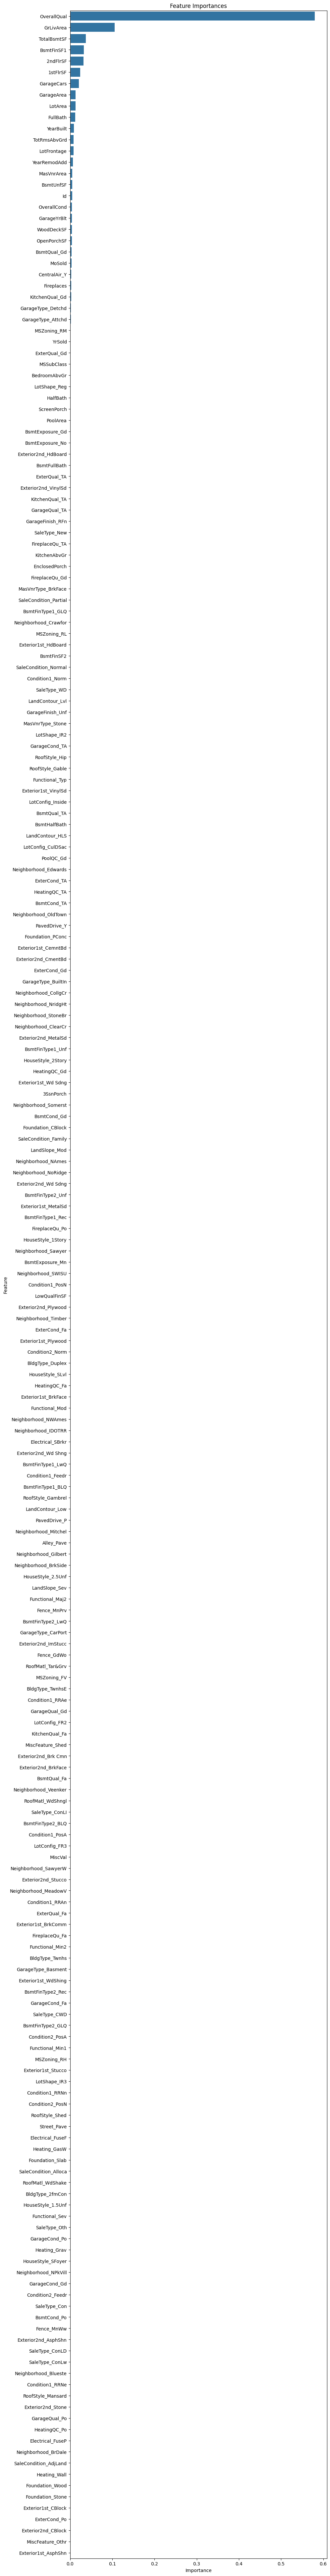

In [80]:
# Ploting the feature importances
plt.figure(figsize=(10,100))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Let's take most important 5 features and build a Random Forest model

In [87]:
selected_features = feature_importance_df.head(5)['Feature'].tolist()
selected_features

['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF']

In [88]:
X_train_selected = X_train[selected_features]
X_test_selected = test_data[selected_features]

In [89]:
new_random_forest = RandomForestRegressor()
new_random_forest.fit(X_train_selected, y_train)

RandomForestRegressor()

In [90]:
y_pred_new = new_random_forest.predict(X_test_selected)
y_pred_new

array([118623.  , 174256.07, 159845.  , ..., 160219.48, 117829.5 ,
       229256.9 ])

# i can't find the accuracy for the test_data since i don't have the true values 

### so by spliting the train_data we found the acccuracy above for random forest , for that i will find the accuray by taking only most important features.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('SalePrice', axis=1), train_data['SalePrice'],test_size=0.2, random_state=42)

In [92]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [93]:
X_train_selected

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,2ndFlrSF
254,5.0,1314.0,1314.0,922.0,0.0
1066,6.0,1571.0,799.0,0.0,772.0
638,5.0,796.0,796.0,0.0,0.0
799,5.0,1768.0,731.0,569.0,787.0
380,5.0,1691.0,1026.0,218.0,665.0
...,...,...,...,...,...
1095,6.0,1314.0,1314.0,24.0,0.0
1130,4.0,1981.0,1122.0,622.0,653.0
1294,5.0,864.0,864.0,167.0,0.0
860,7.0,1426.0,912.0,0.0,514.0


In [94]:
new_random_forest = RandomForestRegressor()
new_random_forest.fit(X_train_selected, y_train)

RandomForestRegressor()

In [95]:
y_pred_new = new_random_forest.predict(X_test_selected)
y_pred_new

array([141338.        , 347650.76      , 106019.75      , 152911.5       ,
       288008.1       ,  81757.        , 202344.        , 147914.66      ,
        74698.        , 119316.        , 175780.54333333, 123197.64      ,
        79401.5       , 215969.9       , 165696.        , 141970.5       ,
       190949.75      , 143273.37      , 119875.5       , 193740.        ,
       149783.64      , 207083.8       , 155575.1125    , 121852.5       ,
       186596.5       , 166942.75      , 184083.72      , 106632.        ,
       161086.        , 183851.42      , 109311.        , 236371.84      ,
       154934.55      , 107358.5       , 263410.83      , 146262.5       ,
       158937.23      , 203078.        , 312712.78      , 105842.        ,
       117334.        , 229044.86      , 118266.7       , 334703.        ,
       136394.        , 199027.8       , 119602.        , 134443.4       ,
       419234.69      , 147993.02      , 133129.16      , 189452.        ,
       115213.26      , 3

In [96]:
mse_random_forest = mean_squared_error(y_test, y_pred_new)
mse_random_forest

np.float64(937287113.3432224)

In [97]:
errors_rf = abs(y_pred_new - y_test)
mape_rf = 100 * (errors_rf / y_test)
accuracy_rf = 100 - np.mean(mape_rf)
print('Random Forest Accuracy:', round(accuracy_rf, 2), '%.')

Random Forest Accuracy: 87.39 %.


### We can observe that using only 5 main features we are getting 86.9 % where we are getting 89.35 % for all the features.

# 1st Model with all the features :
### Accracy = 89.35 %.
### Mean squared error = 856580801.585
# 2nd Model with most important 5 features :
### Accracy = 86.9 %.
### Mean squared error = 998815044.764

## Sorry sir i need a OTP to join the competition and upload the final_Prediction in kaggel. So i am uploading my final_Prediction in LMS in project3 submission.

#  *END*